In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [35]:
df_store = pd.read_csv('../data/store.csv')
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [36]:
df_train = pd.read_csv('../data/train.csv', low_memory=False)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [37]:
df = pd.merge(df_train, df_store, on="Store", how="left")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [38]:
# Number of unique stores
print(f"Number of unique stores: {df['Store'].nunique()}")
# Avarage sales per store
print(f"Average sales per store: {df['Sales'].mean()}")
#Missing values
print(f"Missing values in train data: {df.isnull().sum()}")

Number of unique stores: 1115
Average sales per store: 5773.818972305593
Missing values in train data: Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


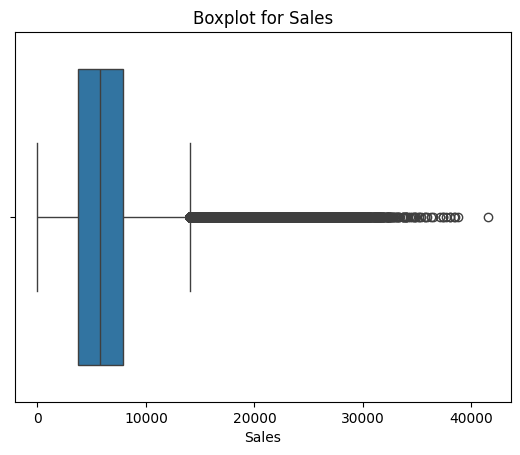

In [44]:
import seaborn as sns

sns.boxplot(x=df["Sales"])
plt.title("Boxplot for Sales")
plt.show()

In [45]:
df["Sales"].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [39]:
df.groupby("DayOfWeek")["Sales"].mean().sort_index()

DayOfWeek
1    7809.044510
2    7005.244467
3    6555.884138
4    6247.575913
5    6723.274305
6    5847.562599
7     204.183189
Name: Sales, dtype: float64

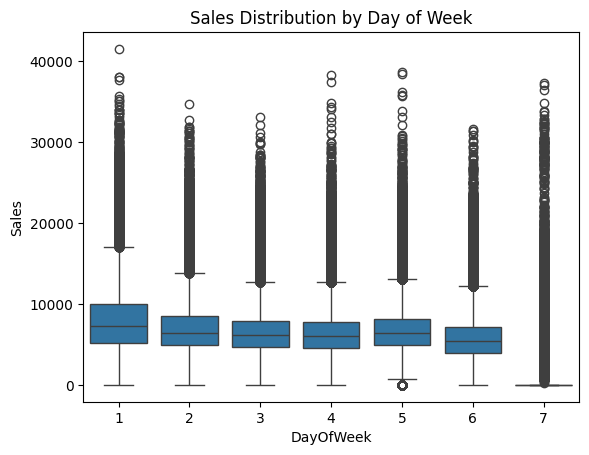

In [40]:


sns.boxplot(x="DayOfWeek", y="Sales", data=df)
plt.title("Sales Distribution by Day of Week")
plt.show()

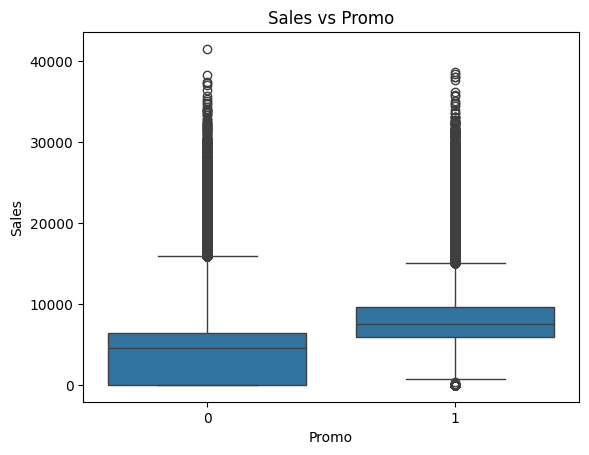

In [41]:
sns.boxplot(x="Promo", y="Sales", data=df)
plt.title("Sales vs Promo")
plt.show()

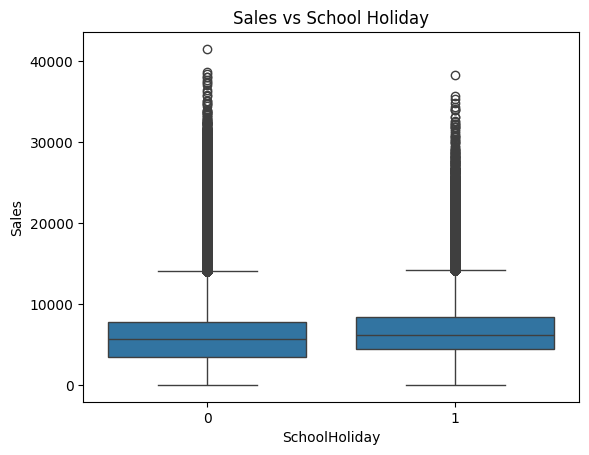

In [42]:
sns.boxplot(x="SchoolHoliday", y="Sales", data=df)
plt.title("Sales vs School Holiday")
plt.show()

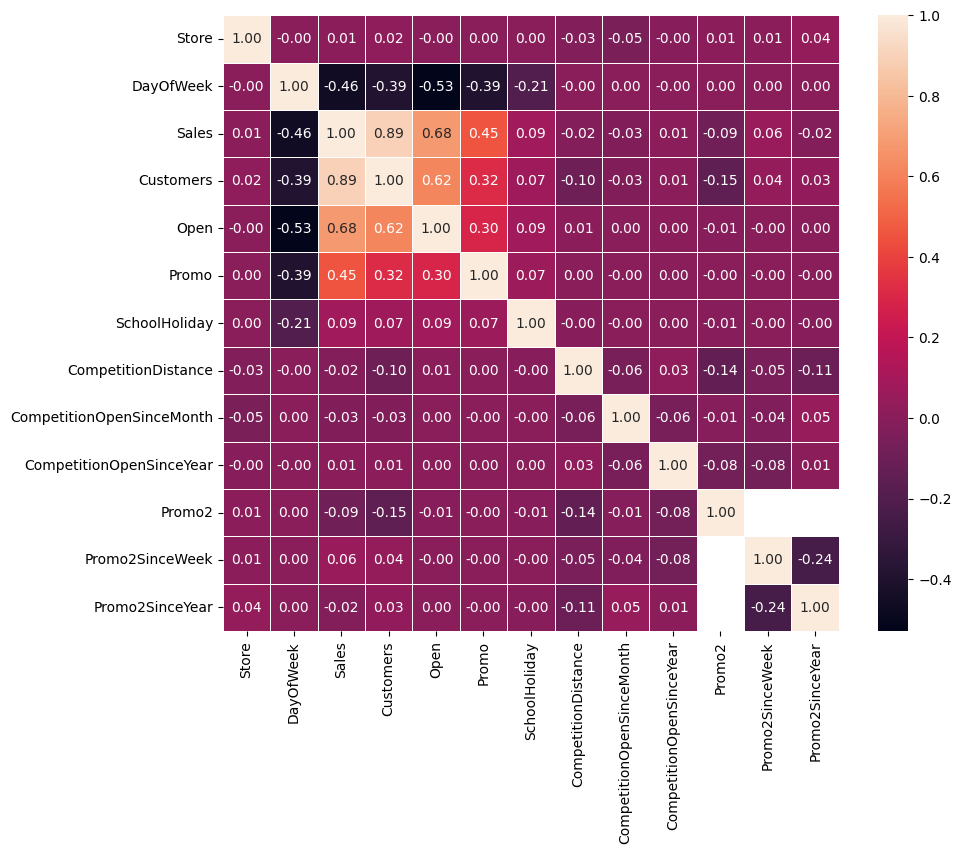

In [43]:
# Nur numerische Spalten
num_df = df.select_dtypes(include=[np.number])

# Korrelationsmatrix
corr = num_df.corr()

# Heatmap zeichnen
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, linewidths=0.5)
plt.show()

According to heatmap I would start from DayOfWeek, Open And Promo features. Customers is also value that is with sales dependent. But we could not predict how many castomers will be at that day

? missing state holliday. I think this kann influance sales.